##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE162498**

file previously downloaded:
* GSE162498_RAW.tar

unzipped using 
``` bash
tar -xvf GSE162498_RAW.tar
```

This gives the following files: 
* GSM4952953_P34_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952954_P35_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952955_P42_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952956_P43_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952957_P46_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952958_P47_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952959_P55_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952960_P57_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952961_P57_Blood_raw_feature_bc_matrix.tar.gz
* GSM4952962_P58_Tumor_filtered_feature_bc_matrix.tar.gz
* GSM4952963_P58_Blood_filtered_feature_bc_matrix.tar.gz
* GSM4952964_P60_Tumor_filtered_feature_bc_matrix.tar.gz
* GSM4952965_P60_Juxta_filtered_feature_bc_matrix.tar.gz
* GSM4952966_P60_Blood_filtered_feature_bc_matrix.tar.gz
* GSM4952967_P61_Tumor_filtered_feature_bc_matrix.tar.gz
* GSM4952968_P61_Juxta_filtered_feature_bc_matrix.tar.gz
* GSM4952969_P61_Blood_filtered_feature_bc_matrix.tar.gz

Only using tumour and jaxta (adjacent healthy), not blood (moved to seperate sufolder)

I then used tar -xvf again to unzip each of the files above. This gives a folder per sample each containing standard barcodes, genes, and matrix file. (renamed as needed for loading, and had to then gzip all files to get the .gz needed)

Dataset is meant to contain data from 11 tumour and 2 juxta from patients with NSCLC

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE162498')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE162498"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [6]:
P34_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P34_Tumor")
P35_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P35_Tumor")
P42_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P42_Tumor")
P43_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P43_Tumor")
P46_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P46_Tumor")
P47_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P47_Tumor")
P55_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P55_Tumor")
P57_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P57_Tumor")
P58_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P58_Tumor")
P60_J.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P60_Juxta")
P60_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P60_Tumor")
P61_J.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P61_Juxta")
P61_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P61_Tumor")


In [7]:
head(colnames(P43_T.data))
head(colnames(P60_T.data))
head(colnames(P61_J.data))

[1] "AAACCTGAGAAACCAT-1" "AAACCTGAGAAACCGC-1" "AAACCTGAGAAACCTA-1"
[4] "AAACCTGAGAAACGAG-1" "AAACCTGAGAAACGCC-1" "AAACCTGAGAAAGTGG-1"

[1] "AAACCTGAGCCCGAAA-1" "AAACCTGAGCTTATCG-1" "AAACCTGAGGCTATCT-1"
[4] "AAACCTGAGGTCGGAT-1" "AAACCTGAGTTAGGTA-1" "AAACCTGCAAATCCGT-1"

[1] "AAACCTGCACGCTTTC-1" "AAACCTGGTCTCCATC-1" "AAACCTGGTGAAGGCT-1"
[4] "AAACCTGGTGACAAAT-1" "AAACGGGCACAAGTAA-1" "AAACGGGCACACCGCA-1"

In [8]:
#add dataset info to colnames
colnames(P34_T.data) <- paste0("GSE162498_NSCLC_P34_", colnames(P34_T.data))
colnames(P35_T.data) <- paste0("GSE162498_NSCLC_P35_", colnames(P35_T.data))
colnames(P42_T.data) <- paste0("GSE162498_NSCLC_P42_", colnames(P42_T.data))
colnames(P43_T.data) <- paste0("GSE162498_NSCLC_P43_", colnames(P43_T.data))
colnames(P46_T.data) <- paste0("GSE162498_NSCLC_P46_", colnames(P46_T.data))
colnames(P47_T.data) <- paste0("GSE162498_NSCLC_P47_", colnames(P47_T.data))
colnames(P55_T.data) <- paste0("GSE162498_NSCLC_P55_", colnames(P55_T.data))
colnames(P57_T.data) <- paste0("GSE162498_NSCLC_P57_", colnames(P57_T.data))
colnames(P58_T.data) <- paste0("GSE162498_NSCLC_P58_", colnames(P58_T.data))
colnames(P60_J.data) <- paste0("GSE162498_Healthy_P60_", colnames(P60_J.data))
colnames(P60_T.data) <- paste0("GSE162498_NSCLC_P60_", colnames(P60_T.data))
colnames(P61_J.data) <- paste0("GSE162498_Healthy_P61_", colnames(P61_J.data))
colnames(P61_T.data) <- paste0("GSE162498_NSCLC_P61_", colnames(P61_T.data))

In [9]:
head(colnames(P43_T.data))
head(colnames(P60_T.data))
head(colnames(P61_J.data))

[1] "GSE162498_NSCLC_P43_AAACCTGAGAAACCAT-1"
[2] "GSE162498_NSCLC_P43_AAACCTGAGAAACCGC-1"
[3] "GSE162498_NSCLC_P43_AAACCTGAGAAACCTA-1"
[4] "GSE162498_NSCLC_P43_AAACCTGAGAAACGAG-1"
[5] "GSE162498_NSCLC_P43_AAACCTGAGAAACGCC-1"
[6] "GSE162498_NSCLC_P43_AAACCTGAGAAAGTGG-1"

[1] "GSE162498_NSCLC_P60_AAACCTGAGCCCGAAA-1"
[2] "GSE162498_NSCLC_P60_AAACCTGAGCTTATCG-1"
[3] "GSE162498_NSCLC_P60_AAACCTGAGGCTATCT-1"
[4] "GSE162498_NSCLC_P60_AAACCTGAGGTCGGAT-1"
[5] "GSE162498_NSCLC_P60_AAACCTGAGTTAGGTA-1"
[6] "GSE162498_NSCLC_P60_AAACCTGCAAATCCGT-1"

[1] "GSE162498_Healthy_P61_AAACCTGCACGCTTTC-1"
[2] "GSE162498_Healthy_P61_AAACCTGGTCTCCATC-1"
[3] "GSE162498_Healthy_P61_AAACCTGGTGAAGGCT-1"
[4] "GSE162498_Healthy_P61_AAACCTGGTGACAAAT-1"
[5] "GSE162498_Healthy_P61_AAACGGGCACAAGTAA-1"
[6] "GSE162498_Healthy_P61_AAACGGGCACACCGCA-1"

In [10]:
#create seperate seurat object for each sample
P34_T <- CreateSeuratObject(counts = P34_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P34_T@meta.data$sample_type <- "tumour"
P34_T@meta.data$cancer_type <- "NSCLC"
P34_T@meta.data$patient_id <- "P34"
P34_T@meta.data$sample_id <- "GSE162498_NSCLC_P34"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [11]:
#create seperate seurat object for each sample
P35_T <- CreateSeuratObject(counts = P35_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P35_T@meta.data$sample_type <- "tumour"
P35_T@meta.data$cancer_type <- "NSCLC"
P35_T@meta.data$patient_id <- "P35"
P35_T@meta.data$sample_id <- "GSE162498_NSCLC_P35"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [12]:
#create seperate seurat object for each sample
P42_T <- CreateSeuratObject(counts = P42_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P42_T@meta.data$sample_type <- "tumour"
P42_T@meta.data$cancer_type <- "NSCLC"
P42_T@meta.data$patient_id <- "P42"
P42_T@meta.data$sample_id <- "GSE162498_NSCLC_P42"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [13]:
#create seperate seurat object for each sample
P43_T <- CreateSeuratObject(counts = P43_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P43_T@meta.data$sample_type <- "tumour"
P43_T@meta.data$cancer_type <- "NSCLC"
P43_T@meta.data$patient_id <- "P43"
P43_T@meta.data$sample_id <- "GSE162498_NSCLC_P43"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [14]:
#create seperate seurat object for each sample
P46_T <- CreateSeuratObject(counts = P46_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P46_T@meta.data$sample_type <- "tumour"
P46_T@meta.data$cancer_type <- "NSCLC"
P46_T@meta.data$patient_id <- "P46"
P46_T@meta.data$sample_id <- "GSE162498_NSCLC_P46"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [15]:
#create seperate seurat object for each sample
P47_T <- CreateSeuratObject(counts = P47_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P47_T@meta.data$sample_type <- "tumour"
P47_T@meta.data$cancer_type <- "NSCLC"
P47_T@meta.data$patient_id <- "P47"
P47_T@meta.data$sample_id <- "GSE162498_NSCLC_P47"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [16]:
#create seperate seurat object for each sample
P55_T <- CreateSeuratObject(counts = P55_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P55_T@meta.data$sample_type <- "tumour"
P55_T@meta.data$cancer_type <- "NSCLC"
P55_T@meta.data$patient_id <- "P55"
P55_T@meta.data$sample_id <- "GSE162498_NSCLC_P55"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [17]:
#create seperate seurat object for each sample
P57_T <- CreateSeuratObject(counts = P57_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P57_T@meta.data$sample_type <- "tumour"
P57_T@meta.data$cancer_type <- "NSCLC"
P57_T@meta.data$patient_id <- "P57"
P57_T@meta.data$sample_id <- "GSE162498_NSCLC_P57"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [18]:
#create seperate seurat object for each sample
P58_T <- CreateSeuratObject(counts = P58_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P58_T@meta.data$sample_type <- "tumour"
P58_T@meta.data$cancer_type <- "NSCLC"
P58_T@meta.data$patient_id <- "P58"
P58_T@meta.data$sample_id <- "GSE162498_NSCLC_P58"


In [19]:
#create seperate seurat object for each sample
P60_T <- CreateSeuratObject(counts = P60_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P60_T@meta.data$sample_type <- "tumour"
P60_T@meta.data$cancer_type <- "NSCLC"
P60_T@meta.data$patient_id <- "P60"
P60_T@meta.data$sample_id <- "GSE162498_NSCLC_P60"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [20]:
#create seperate seurat object for each sample
P61_T <- CreateSeuratObject(counts = P61_T.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P61_T@meta.data$sample_type <- "tumour"
P61_T@meta.data$cancer_type <- "NSCLC"
P61_T@meta.data$patient_id <- "P61"
P61_T@meta.data$sample_id <- "GSE162498_NSCLC_P61"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [21]:
#create seperate seurat object for each sample
P60_J <- CreateSeuratObject(counts = P60_J.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P60_J@meta.data$sample_type <- "adjacent healthy"
P60_J@meta.data$cancer_type <- "healthy"
P60_J@meta.data$patient_id <- "P60"
P60_J@meta.data$sample_id <- "GSE162498_healthy_P60"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [22]:
#create seperate seurat object for each sample
P61_J <- CreateSeuratObject(counts = P61_J.data, project = "GSE162498", min.features = 200)
#add metadata to sample
P61_J@meta.data$sample_type <- "adjacent healthy"
P61_J@meta.data$cancer_type <- "healthy"
P61_J@meta.data$patient_id <- "P61"
P61_J@meta.data$sample_id <- "GSE162498_healthy_P61"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [23]:
head(P34_T@meta.data) 
head(P57_T@meta.data) 
head(P60_J@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 GSE162498  4819       1184        
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 GSE162498   980        450        
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 GSE162498  6809       2199        
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 GSE162498  1236        631        
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 GSE162498  2610       1057        
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 GSE162498  5464       1231        
                                       sample_type cancer_type patient_id
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 tumour      NSCLC       P34       
                                       sample_id          
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 GSE162498_NSCLC_P34

orig.ident nCount_RNA nFeature_RNA
GSE162498_NSCLC_P57_AAACCTGAGAGTGACC-1 GSE162498   577       411         
GSE162498_NSCLC_P57_AAACCTGAGATCCCAT-1 GSE162498   396       300         
GSE162498_NSCLC_P57_AAACCTGAGCGAAGGG-1 GSE162498   892       633         
GSE162498_NSCLC_P57_AAACCTGAGCGTCTAT-1 GSE162498   566       437         
GSE162498_NSCLC_P57_AAACCTGAGTTTGCGT-1 GSE162498   872       640         
GSE162498_NSCLC_P57_AAACCTGCAATGGATA-1 GSE162498  1225       737         
                                       sample_type cancer_type patient_id
GSE162498_NSCLC_P57_AAACCTGAGAGTGACC-1 tumour      NSCLC       P57       
GSE162498_NSCLC_P57_AAACCTGAGATCCCAT-1 tumour      NSCLC       P57       
GSE162498_NSCLC_P57_AAACCTGAGCGAAGGG-1 tumour      NSCLC       P57       
GSE162498_NSCLC_P57_AAACCTGAGCGTCTAT-1 tumour      NSCLC       P57       
GSE162498_NSCLC_P57_AAACCTGAGTTTGCGT-1 tumour      NSCLC       P57       
GSE162498_NSCLC_P57_AAACCTGCAATGGATA-1 tumour      NSCLC       P57       
                                       sample_id          
GSE162498_NSCLC_P57_AAACCTGAGAGTGACC-1 GSE162498_NSCLC_P57
GSE162498_NSCLC_P57_AAACCTGAGATCCCAT-1 GSE162498_NSCLC_P57
GSE162498_NSCLC_P57_AAACCTGAGCGAAGGG-1 GSE162498_NSCLC_P57
GSE162498_NSCLC_P57_AAACCTGAGCGTCTAT-1 GSE162498_NSCLC_P57
GSE162498_NSCLC_P57_AAACCTGAGTTTGCGT-1 GSE162498_NSCLC_P57
GSE162498_NSCLC_P57_AAACCTGCAATGGATA-1 GSE162498_NSCLC_P57

orig.ident nCount_RNA nFeature_RNA
GSE162498_Healthy_P60_AAACCTGAGATCCCGC-1 GSE162498   1654       890        
GSE162498_Healthy_P60_AAACCTGCACCAGGCT-1 GSE162498  18090      3862        
GSE162498_Healthy_P60_AAACCTGCAGATCGGA-1 GSE162498   2151      1092        
GSE162498_Healthy_P60_AAACCTGGTACGAAAT-1 GSE162498   3804      1530        
GSE162498_Healthy_P60_AAACCTGGTTCCACTC-1 GSE162498   1608       763        
GSE162498_Healthy_P60_AAACCTGTCTCCGGTT-1 GSE162498   1054       502        
                                         sample_type      cancer_type
GSE162498_Healthy_P60_AAACCTGAGATCCCGC-1 adjacent healthy healthy    
GSE162498_Healthy_P60_AAACCTGCACCAGGCT-1 adjacent healthy healthy    
GSE162498_Healthy_P60_AAACCTGCAGATCGGA-1 adjacent healthy healthy    
GSE162498_Healthy_P60_AAACCTGGTACGAAAT-1 adjacent healthy healthy    
GSE162498_Healthy_P60_AAACCTGGTTCCACTC-1 adjacent healthy healthy    
GSE162498_Healthy_P60_AAACCTGTCTCCGGTT-1 adjacent healthy healthy    
                                         patient_id sample_id            
GSE162498_Healthy_P60_AAACCTGAGATCCCGC-1 P60        GSE162498_healthy_P60
GSE162498_Healthy_P60_AAACCTGCACCAGGCT-1 P60        GSE162498_healthy_P60
GSE162498_Healthy_P60_AAACCTGCAGATCGGA-1 P60        GSE162498_healthy_P60
GSE162498_Healthy_P60_AAACCTGGTACGAAAT-1 P60        GSE162498_healthy_P60
GSE162498_Healthy_P60_AAACCTGGTTCCACTC-1 P60        GSE162498_healthy_P60
GSE162498_Healthy_P60_AAACCTGTCTCCGGTT-1 P60        GSE162498_healthy_P60

In [24]:
#Merge seurat objects
NSCLC <- merge(P34_T, y = c(P35_T, P42_T, P43_T, P46_T, P47_T, P55_T, P57_T, P58_T, P60_J, P60_T, P61_J, P61_T), project = "GSE162498")

In [25]:
NSCLC
head(NSCLC@meta.data)
tail(NSCLC@meta.data)

An object of class Seurat 
45068 features across 66866 samples within 1 assay 
Active assay: RNA (45068 features, 0 variable features)
 13 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13

orig.ident nCount_RNA nFeature_RNA
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 GSE162498  4819       1184        
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 GSE162498   980        450        
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 GSE162498  6809       2199        
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 GSE162498  1236        631        
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 GSE162498  2610       1057        
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 GSE162498  5464       1231        
                                       sample_type cancer_type patient_id
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 tumour      NSCLC       P34       
                                       sample_id          
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 GSE162498_NSCLC_P34
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 GSE162498_NSCLC_P34

orig.ident nCount_RNA nFeature_RNA
GSE162498_NSCLC_P61_TTTGTCAGTTTGTTGG-1 GSE162498  1168        695        
GSE162498_NSCLC_P61_TTTGTCATCAATACCG-1 GSE162498  3176       1389        
GSE162498_NSCLC_P61_TTTGTCATCAGGCAAG-1 GSE162498  4274       1686        
GSE162498_NSCLC_P61_TTTGTCATCCTTGACC-1 GSE162498  4756       1767        
GSE162498_NSCLC_P61_TTTGTCATCGACGGAA-1 GSE162498  3449       1187        
GSE162498_NSCLC_P61_TTTGTCATCGAGCCCA-1 GSE162498  2868       1202        
                                       sample_type cancer_type patient_id
GSE162498_NSCLC_P61_TTTGTCAGTTTGTTGG-1 tumour      NSCLC       P61       
GSE162498_NSCLC_P61_TTTGTCATCAATACCG-1 tumour      NSCLC       P61       
GSE162498_NSCLC_P61_TTTGTCATCAGGCAAG-1 tumour      NSCLC       P61       
GSE162498_NSCLC_P61_TTTGTCATCCTTGACC-1 tumour      NSCLC       P61       
GSE162498_NSCLC_P61_TTTGTCATCGACGGAA-1 tumour      NSCLC       P61       
GSE162498_NSCLC_P61_TTTGTCATCGAGCCCA-1 tumour      NSCLC       P61       
                                       sample_id          
GSE162498_NSCLC_P61_TTTGTCAGTTTGTTGG-1 GSE162498_NSCLC_P61
GSE162498_NSCLC_P61_TTTGTCATCAATACCG-1 GSE162498_NSCLC_P61
GSE162498_NSCLC_P61_TTTGTCATCAGGCAAG-1 GSE162498_NSCLC_P61
GSE162498_NSCLC_P61_TTTGTCATCCTTGACC-1 GSE162498_NSCLC_P61
GSE162498_NSCLC_P61_TTTGTCATCGACGGAA-1 GSE162498_NSCLC_P61
GSE162498_NSCLC_P61_TTTGTCATCGAGCCCA-1 GSE162498_NSCLC_P61

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


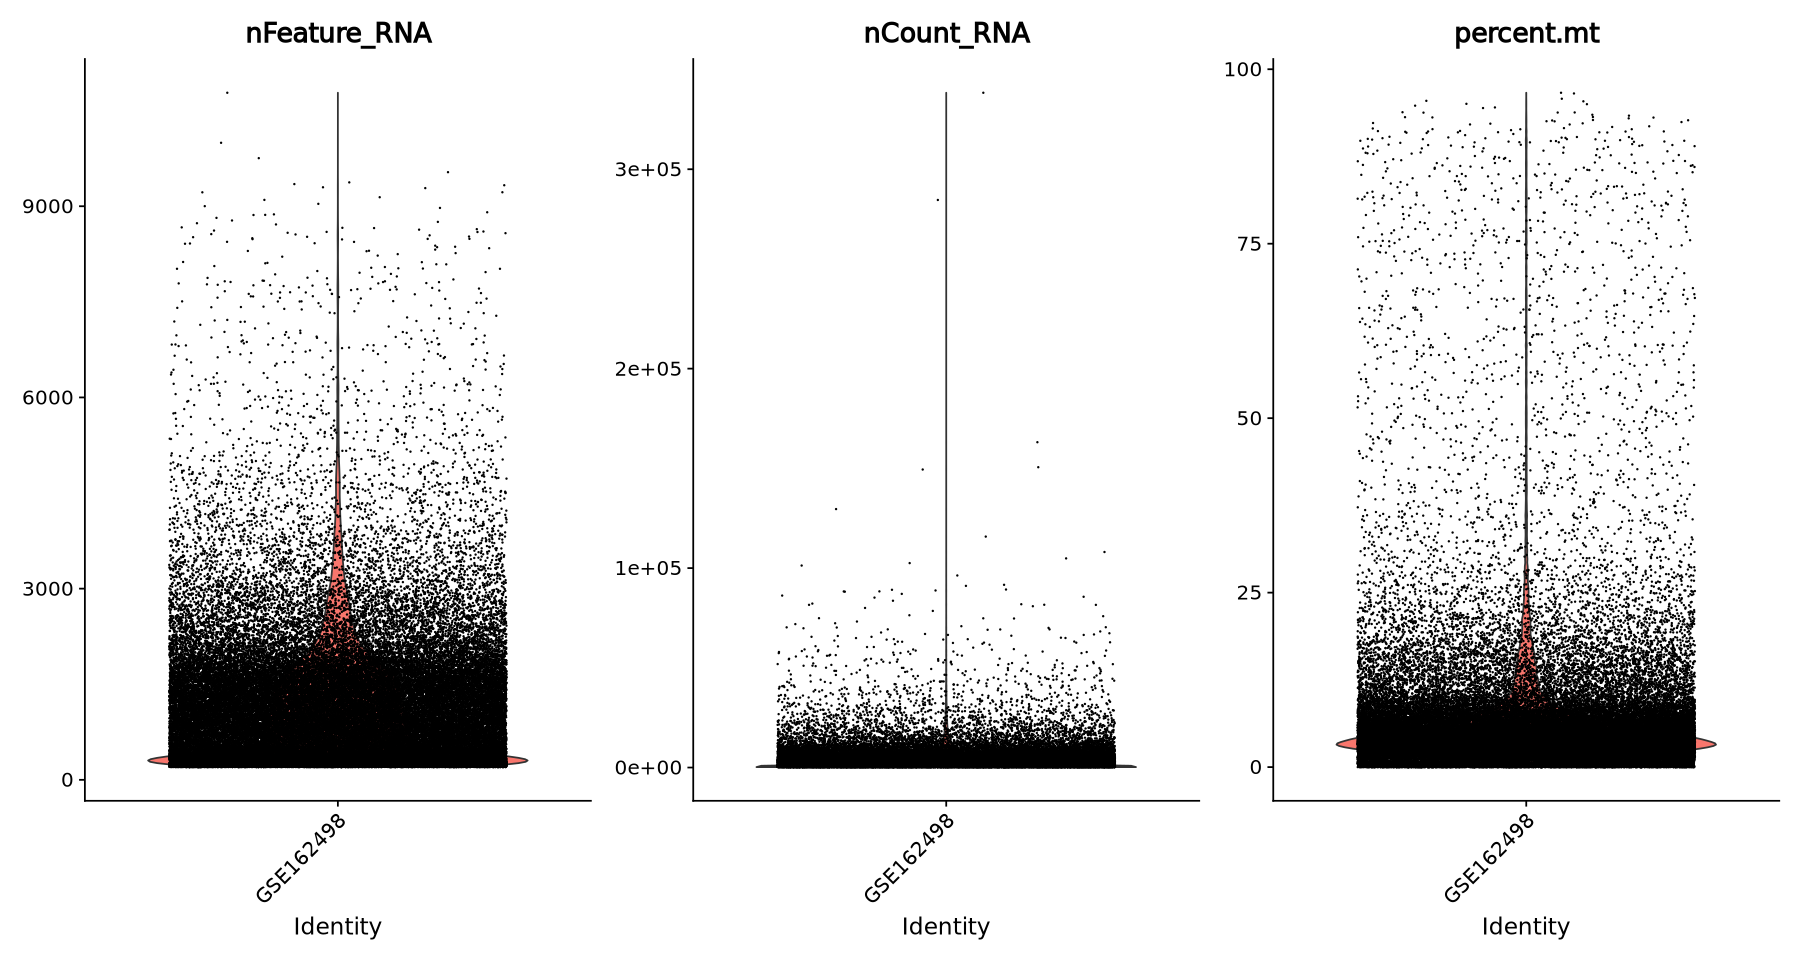

In [26]:
#QC Steps 
NSCLC[["percent.mt"]] <- PercentageFeatureSet(NSCLC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(NSCLC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [27]:
#Normalise the data
NSCLC <- NormalizeData(NSCLC)

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13



In [28]:
#Find variable features
NSCLC <- FindVariableFeatures(NSCLC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer counts.11

Finding variable features for layer counts.12

Finding variable features for layer counts.13



In [29]:
#Scale the data
NSCLC <- ScaleData(NSCLC, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [30]:
#Run PCA
NSCLC <- RunPCA(NSCLC, features = VariableFeatures(object = NSCLC))

PC_ 1 
Positive:  TYROBP, FCER1G, CST3, FTL, LYZ, CD68, C1QA, HLA-DRA, GRN, AIF1 
	   SPI1, MS4A7, C1QB, APOC1, OLR1, CYBB, C1QC, IFI30, C5AR1, SLC11A1 
	   S100A9, MAFB, CD163, CTSZ, CXCL16, MRC1, S100A8, FCGRT, APOE, RAB31 
Negative:  LTB, CCL5, GZMA, HIST1H4C, CCR7, OCIAD2, CD8A, KLRB1, SELL, NKG7 
	   PRF1, GZMK, HMGB2, CD8B, LAG3, PMAIP1, TNFRSF18, TNFRSF4, C12orf75, GZMB 
	   GZMH, MAGEH1, MT-ND6, HIST1H1D, ITM2C, TNFRSF9, FOXP3, PTTG1, MIR4435-2HG, AC133644.2 
PC_ 2 
Positive:  VIM, S100A4, ALOX5AP, HLA-DPB1, PFN1, C1orf162, LST1, OLR1, SPI1, MS4A7 
	   TYROBP, ACP5, HLA-DQA1, AIF1, CYBB, GPR183, FCER1G, CCL5, IFI30, BCL2A1 
	   PLIN2, SNX10, CD163, HLA-DPA1, FCGR3A, SLC11A1, MCEMP1, CSTA, VSIG4, GLRX 
Negative:  KRT8, KRT19, KRT18, CLDN4, WFDC2, ELF3, SFTPB, SLPI, CCND1, CEACAM6 
	   SLC34A2, MDK, KRT7, CLDN3, NAPSA, EPCAM, GPRC5A, LCN2, SDC1, EMP2 
	   MUC1, CD24, BCAM, SFTPA2, SMIM22, AGR2, S100A14, CTTN, MGST1, SFN 
PC_ 3 
Positive:  TPPP3, C20orf85, C9orf24, CAPS, RSPH1, ZM

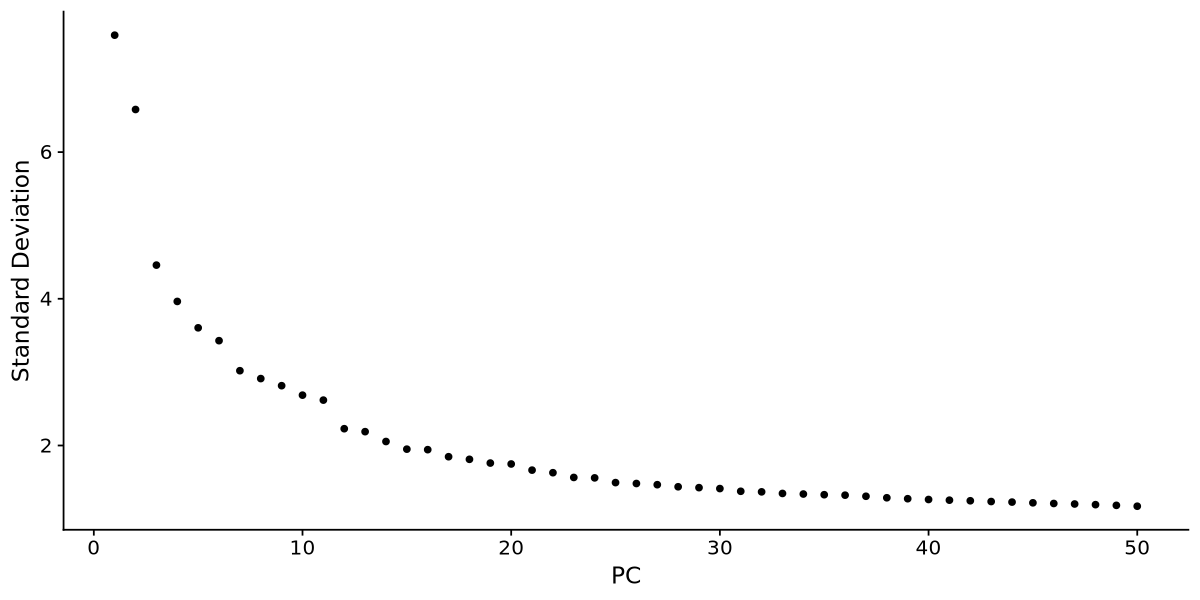

In [31]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(NSCLC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [32]:
#Find neighbours (make sure number matches no. features chosen above)
NSCLC <- FindNeighbors(NSCLC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [33]:
#Run UMAP
NSCLC <- RunUMAP(NSCLC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
08:50:26 UMAP embedding parameters a = 0.9922 b = 1.112



08:50:26 Read 66866 rows and found 40 numeric columns

08:50:26 Using Annoy for neighbor search, n_neighbors = 30

08:50:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:50:30 Writing NN index file to temp file /scratch/temp/9663239/RtmpbV5rtR/file27b43626b6e263

08:50:30 Searching Annoy index using 1 thread, search_k = 3000

08:50:49 Annoy recall = 100%

08:50:50 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:50:53 Initializing from normalized Laplacian + noise (using RSpectra)

08:50:55 Commencing optimization for 200 epochs, with 3127518 positive edges

08:51:20 Optimization finished



In [34]:
#Cluster, resolution here set to 0.2
NSCLC <- FindClusters(NSCLC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 66866
Number of edges: 2320121

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9486
Number of communities: 18
Elapsed time: 14 seconds


3 singletons identified. 15 final clusters.



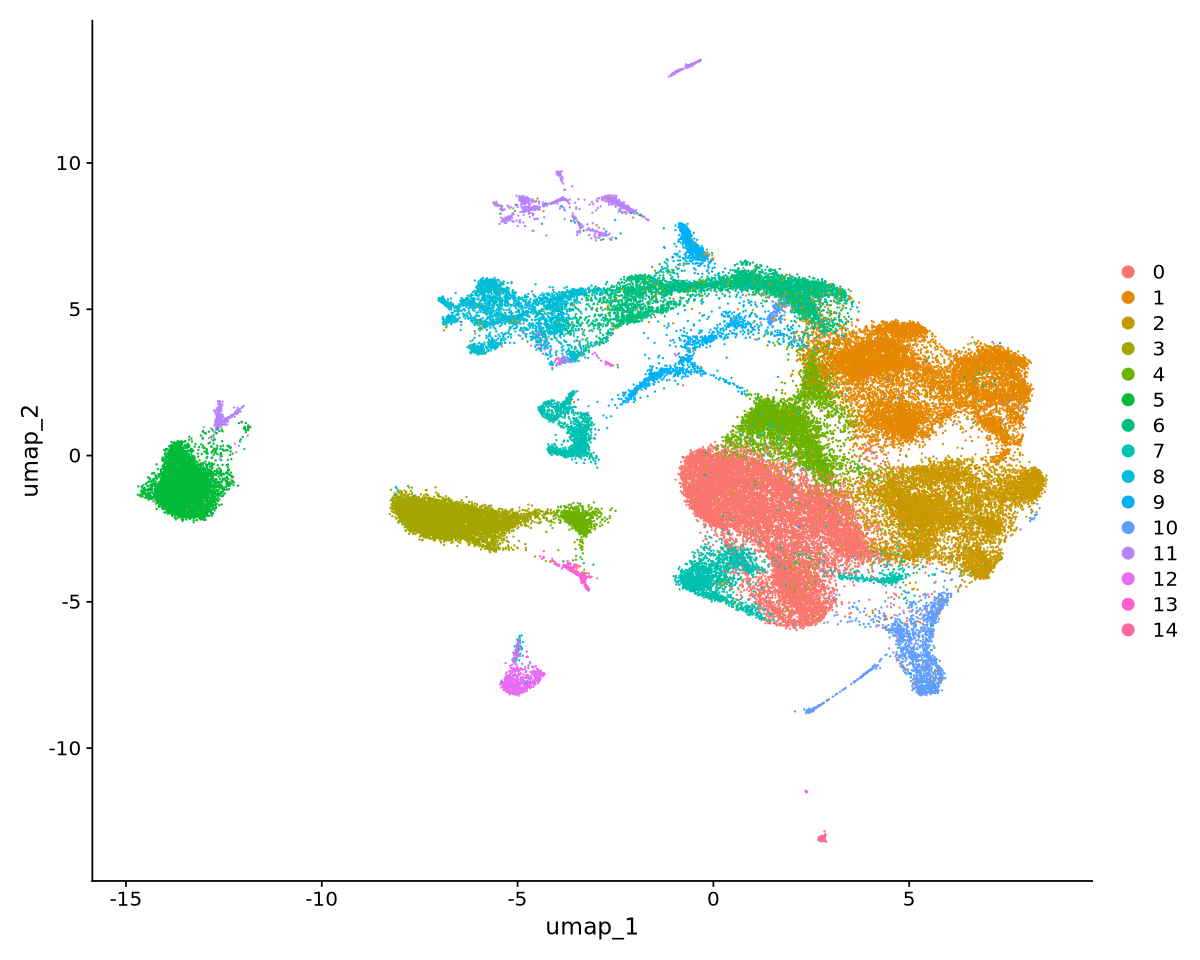

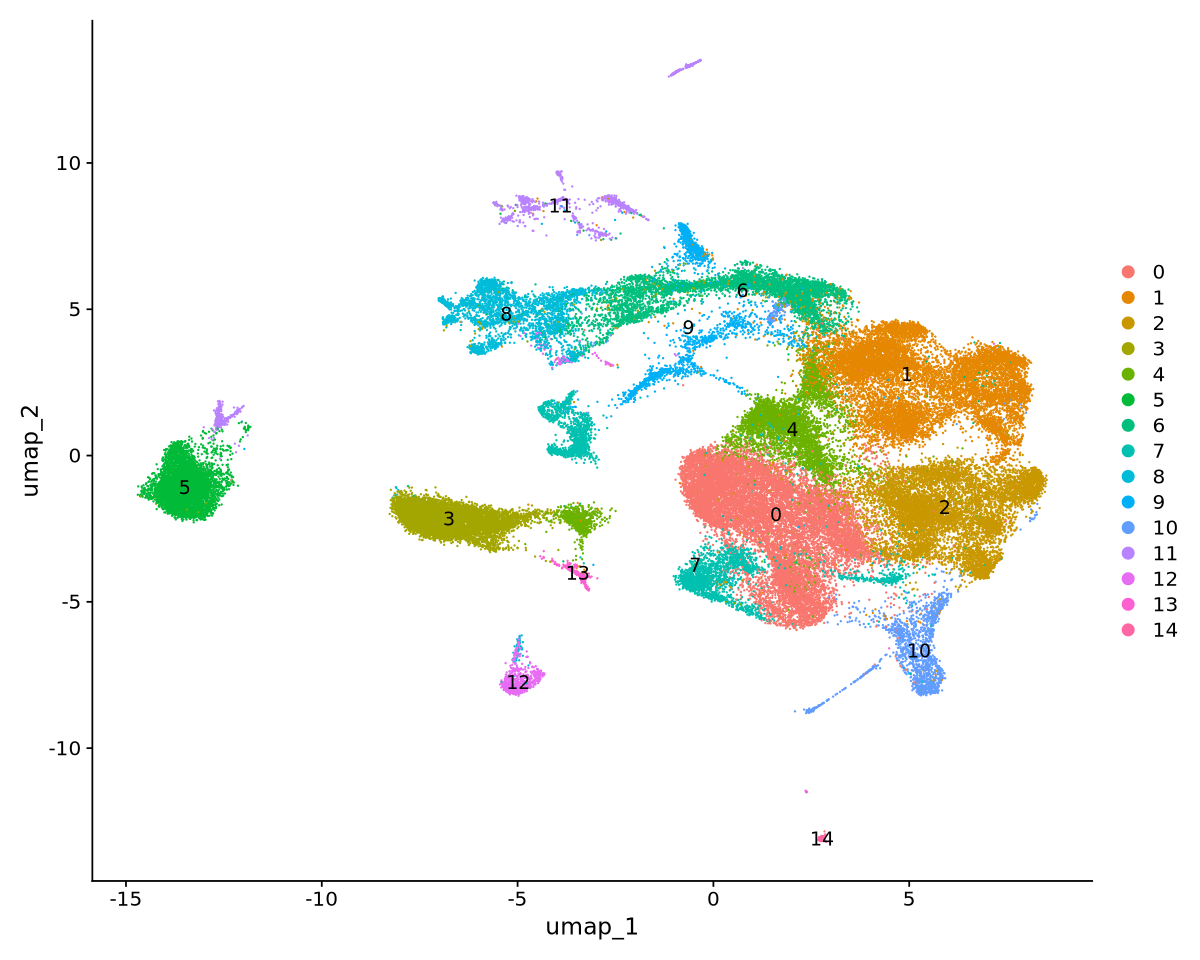

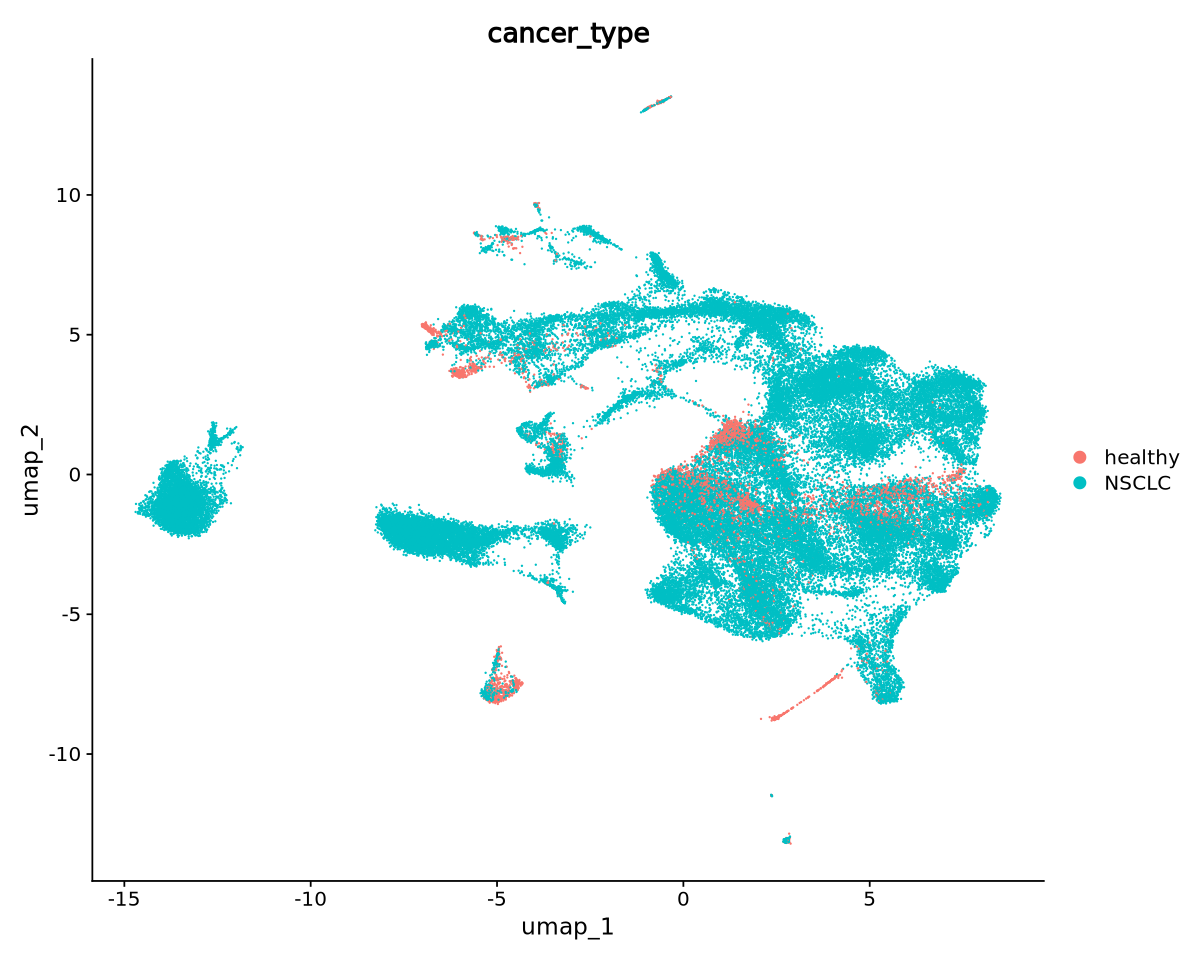

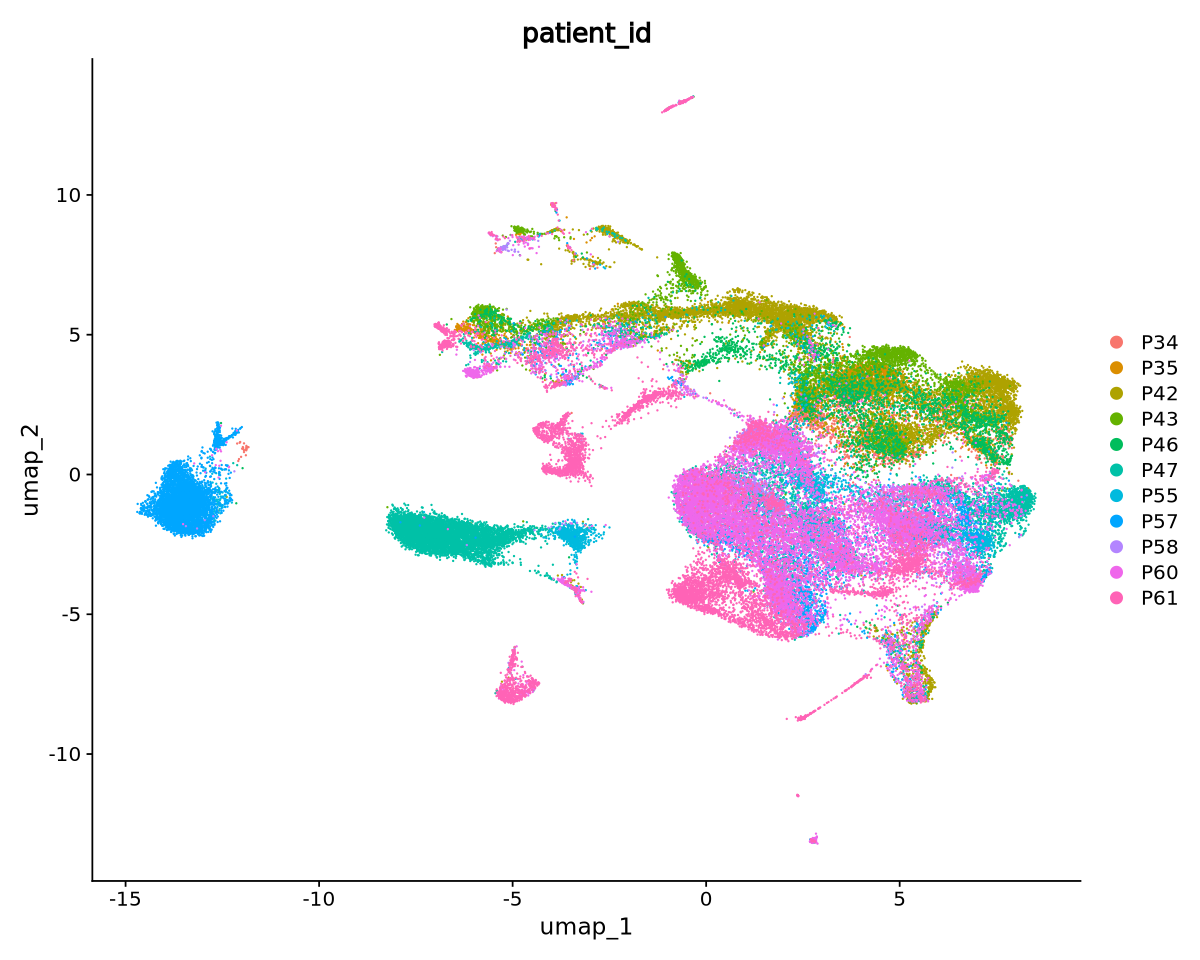

In [35]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(NSCLC, reduction = "umap")
DimPlot(NSCLC, reduction = "umap", label=TRUE)
DimPlot(NSCLC, reduction = "umap", group = "cancer_type")
DimPlot(NSCLC, reduction = "umap", group = "patient_id")

In [36]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(NSCLC, file = "/scratch/user/s4436039/scdata/GSE162498/GSE162498.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

In [3]:
NSCLC <- readRDS(file = "/scratch/user/s4436039/scdata/GSE162498/GSE162498.RDS")

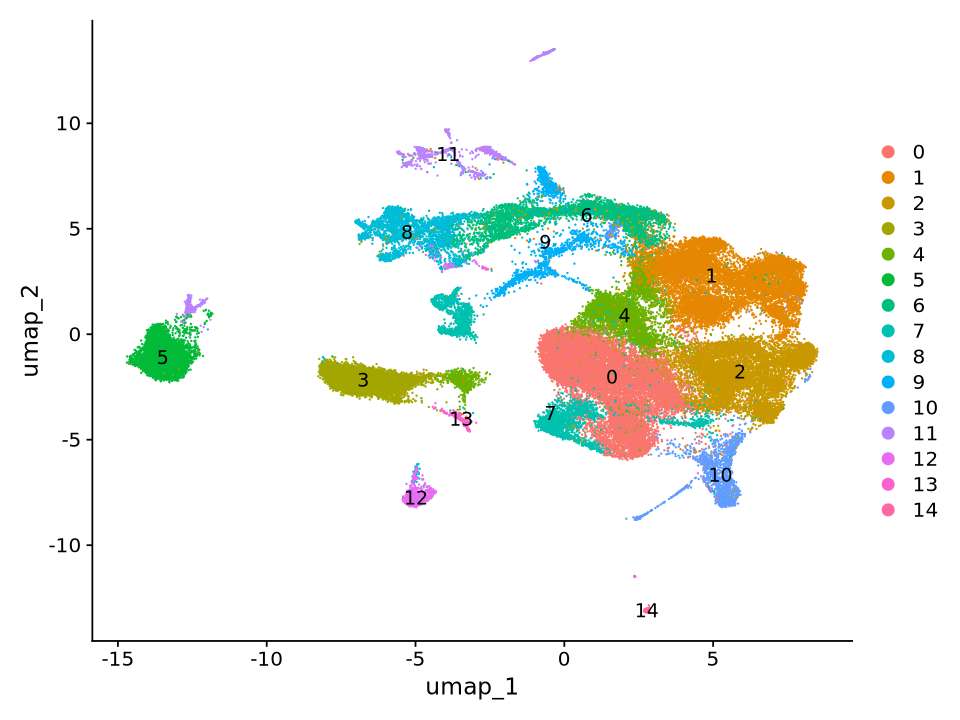

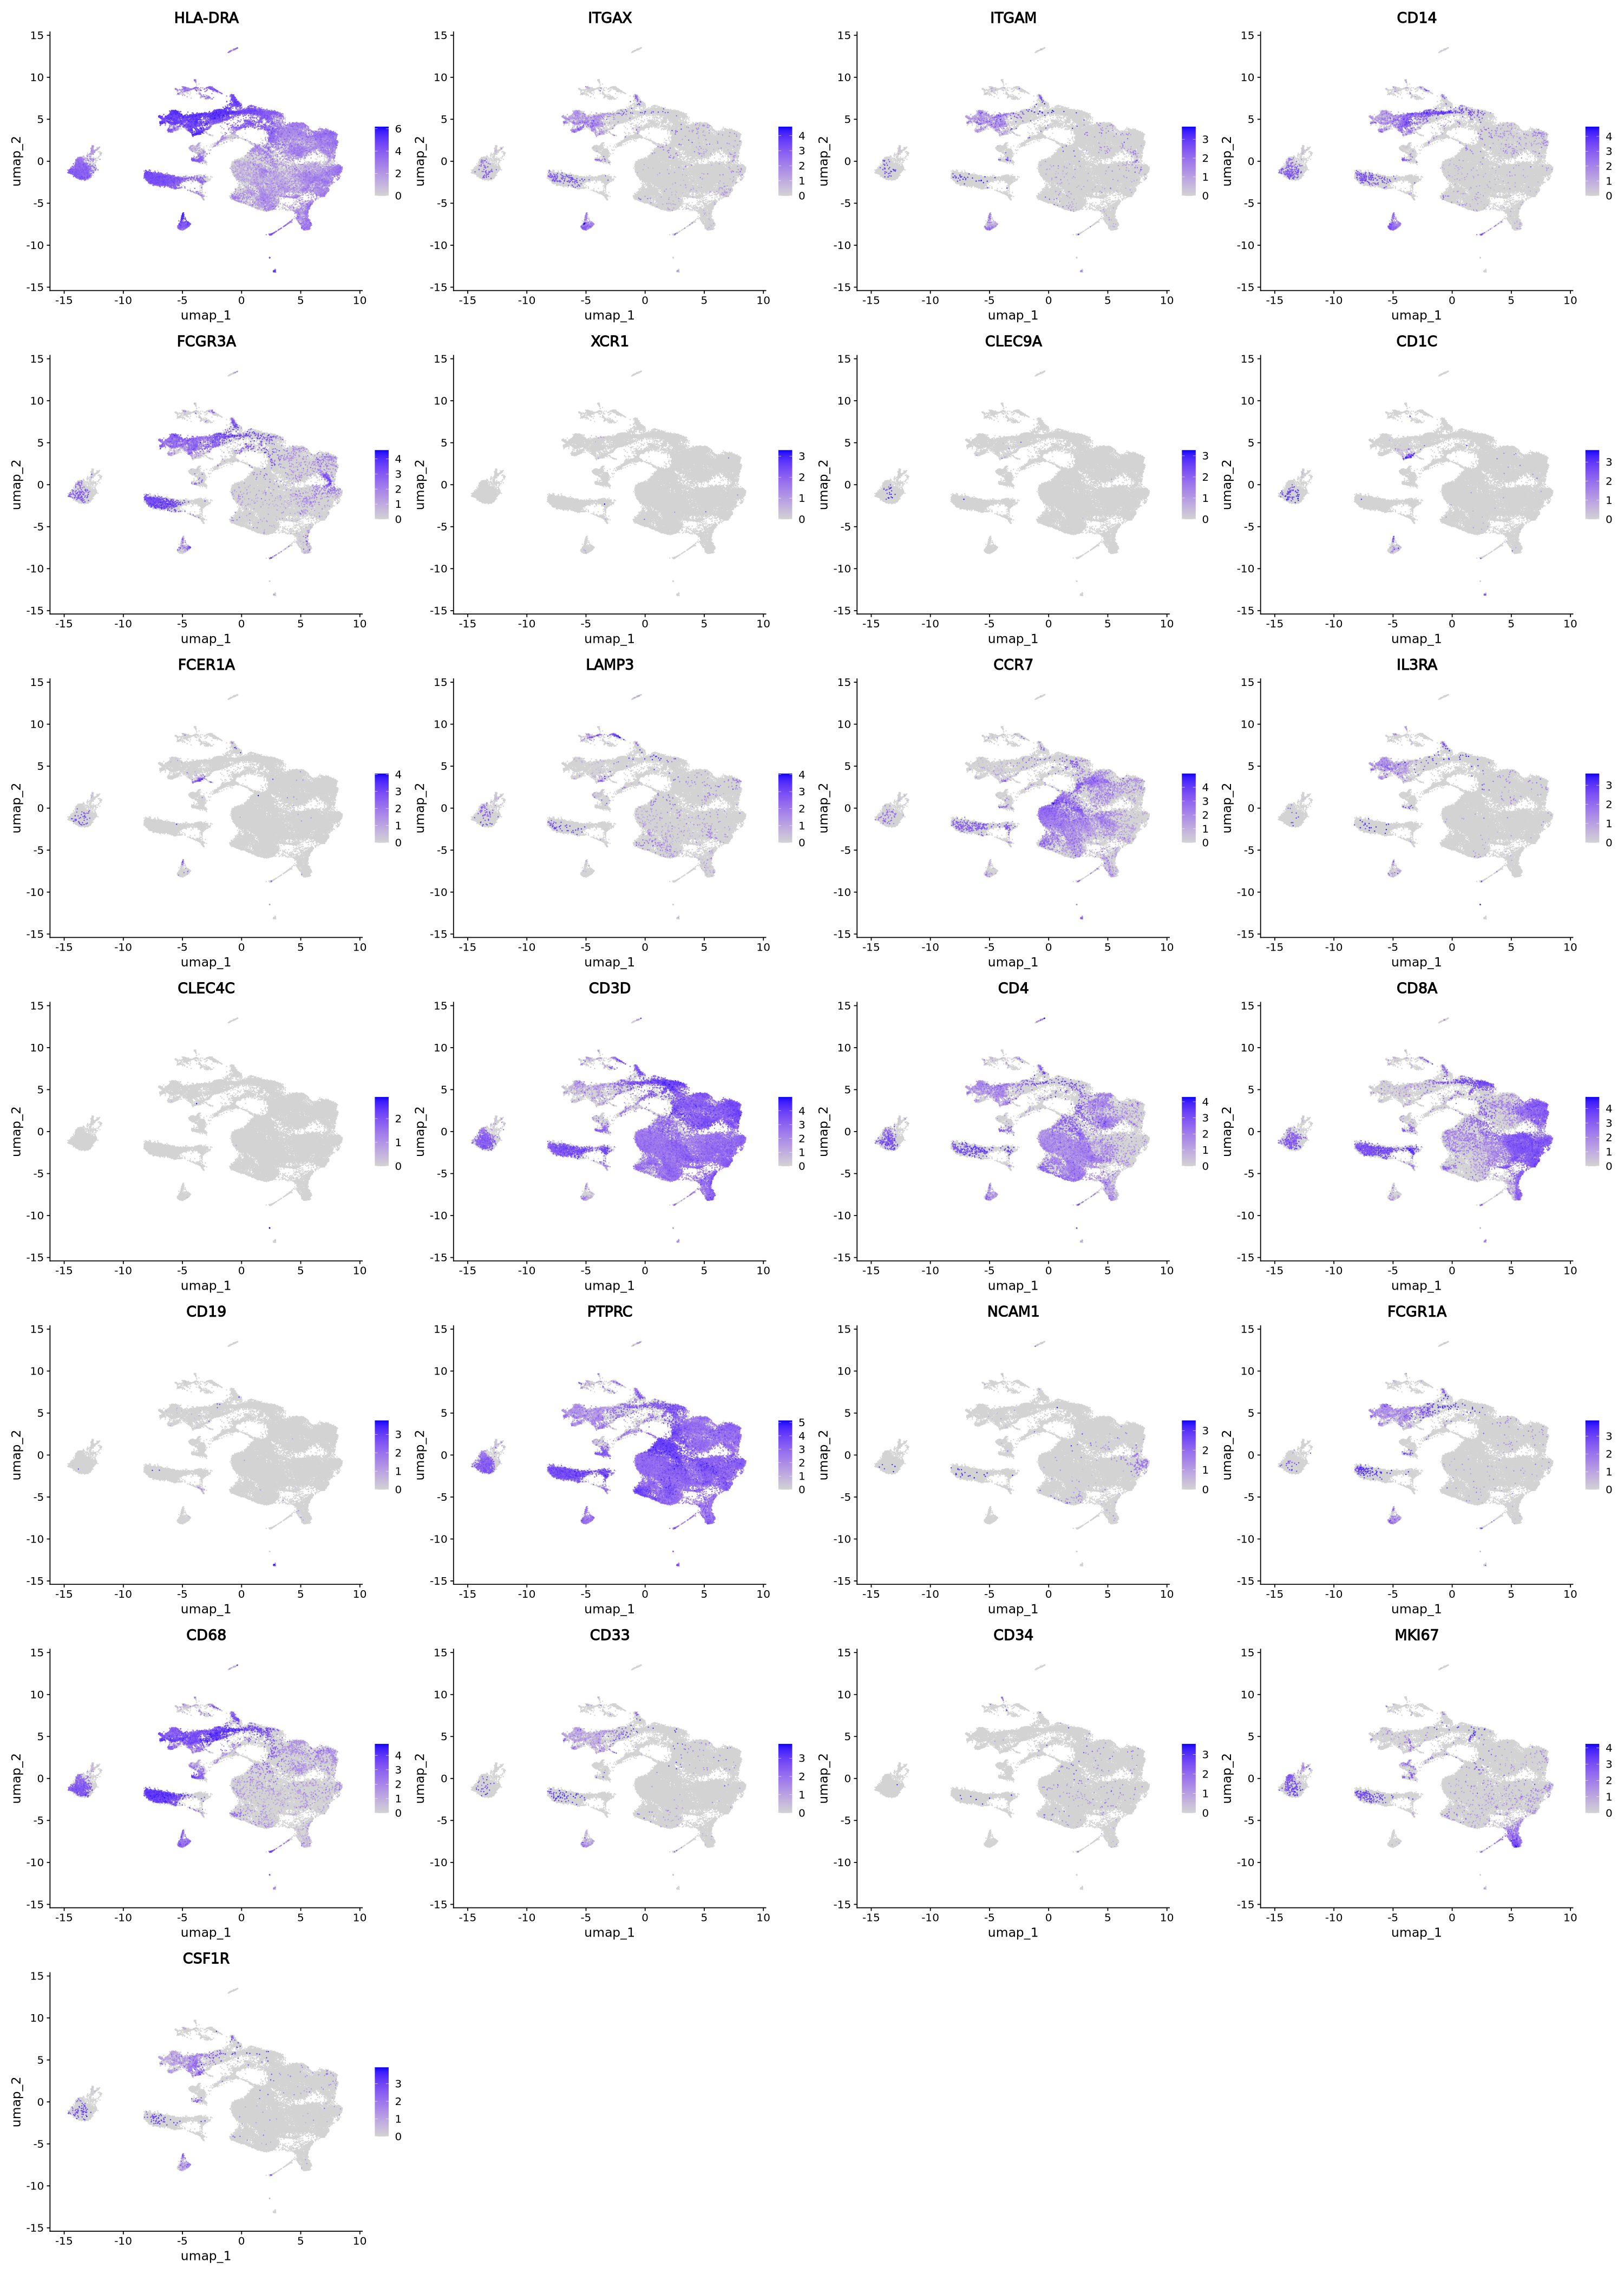

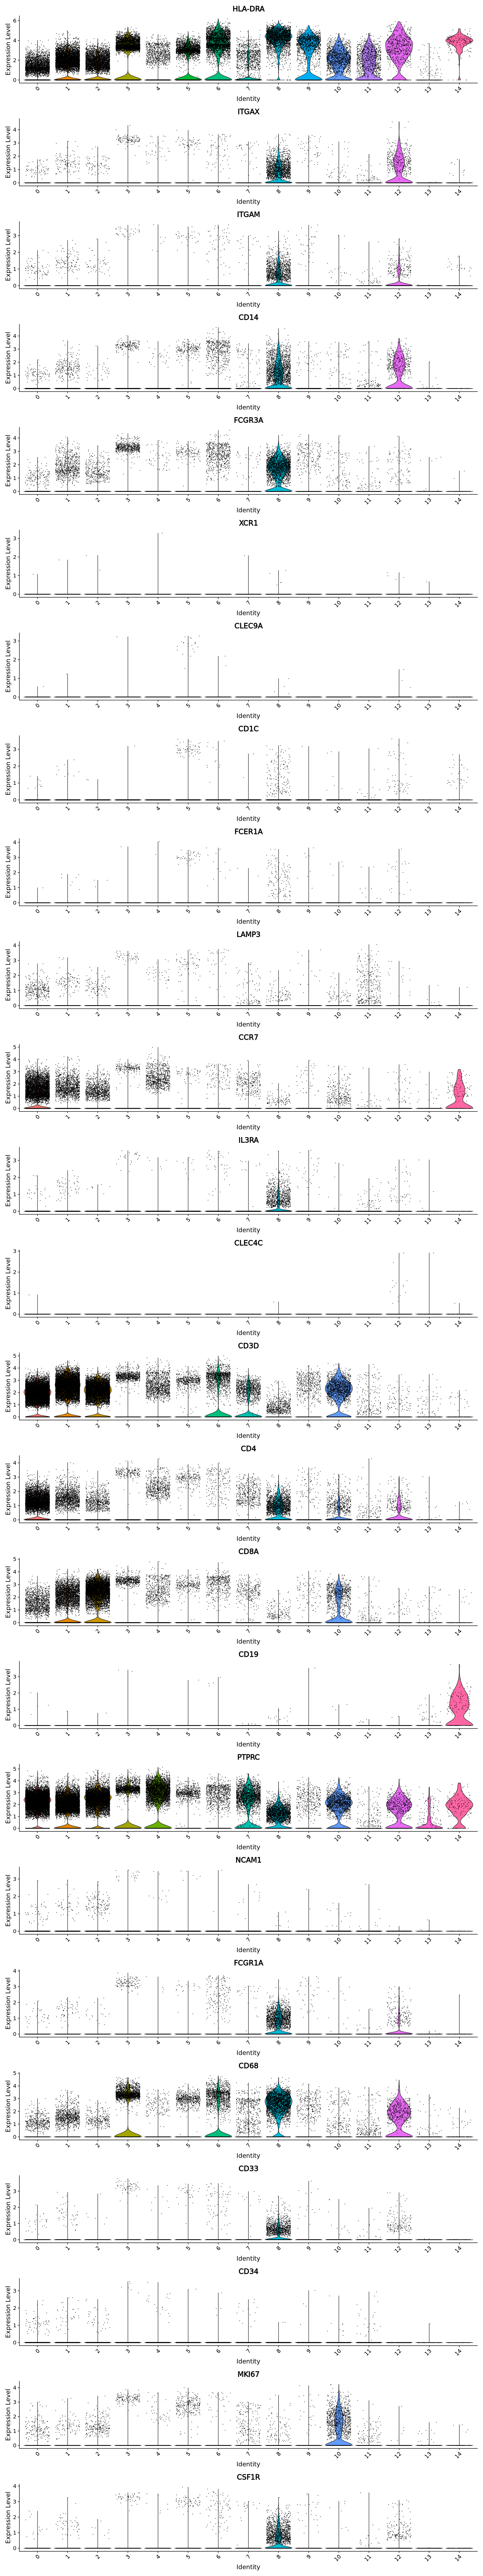

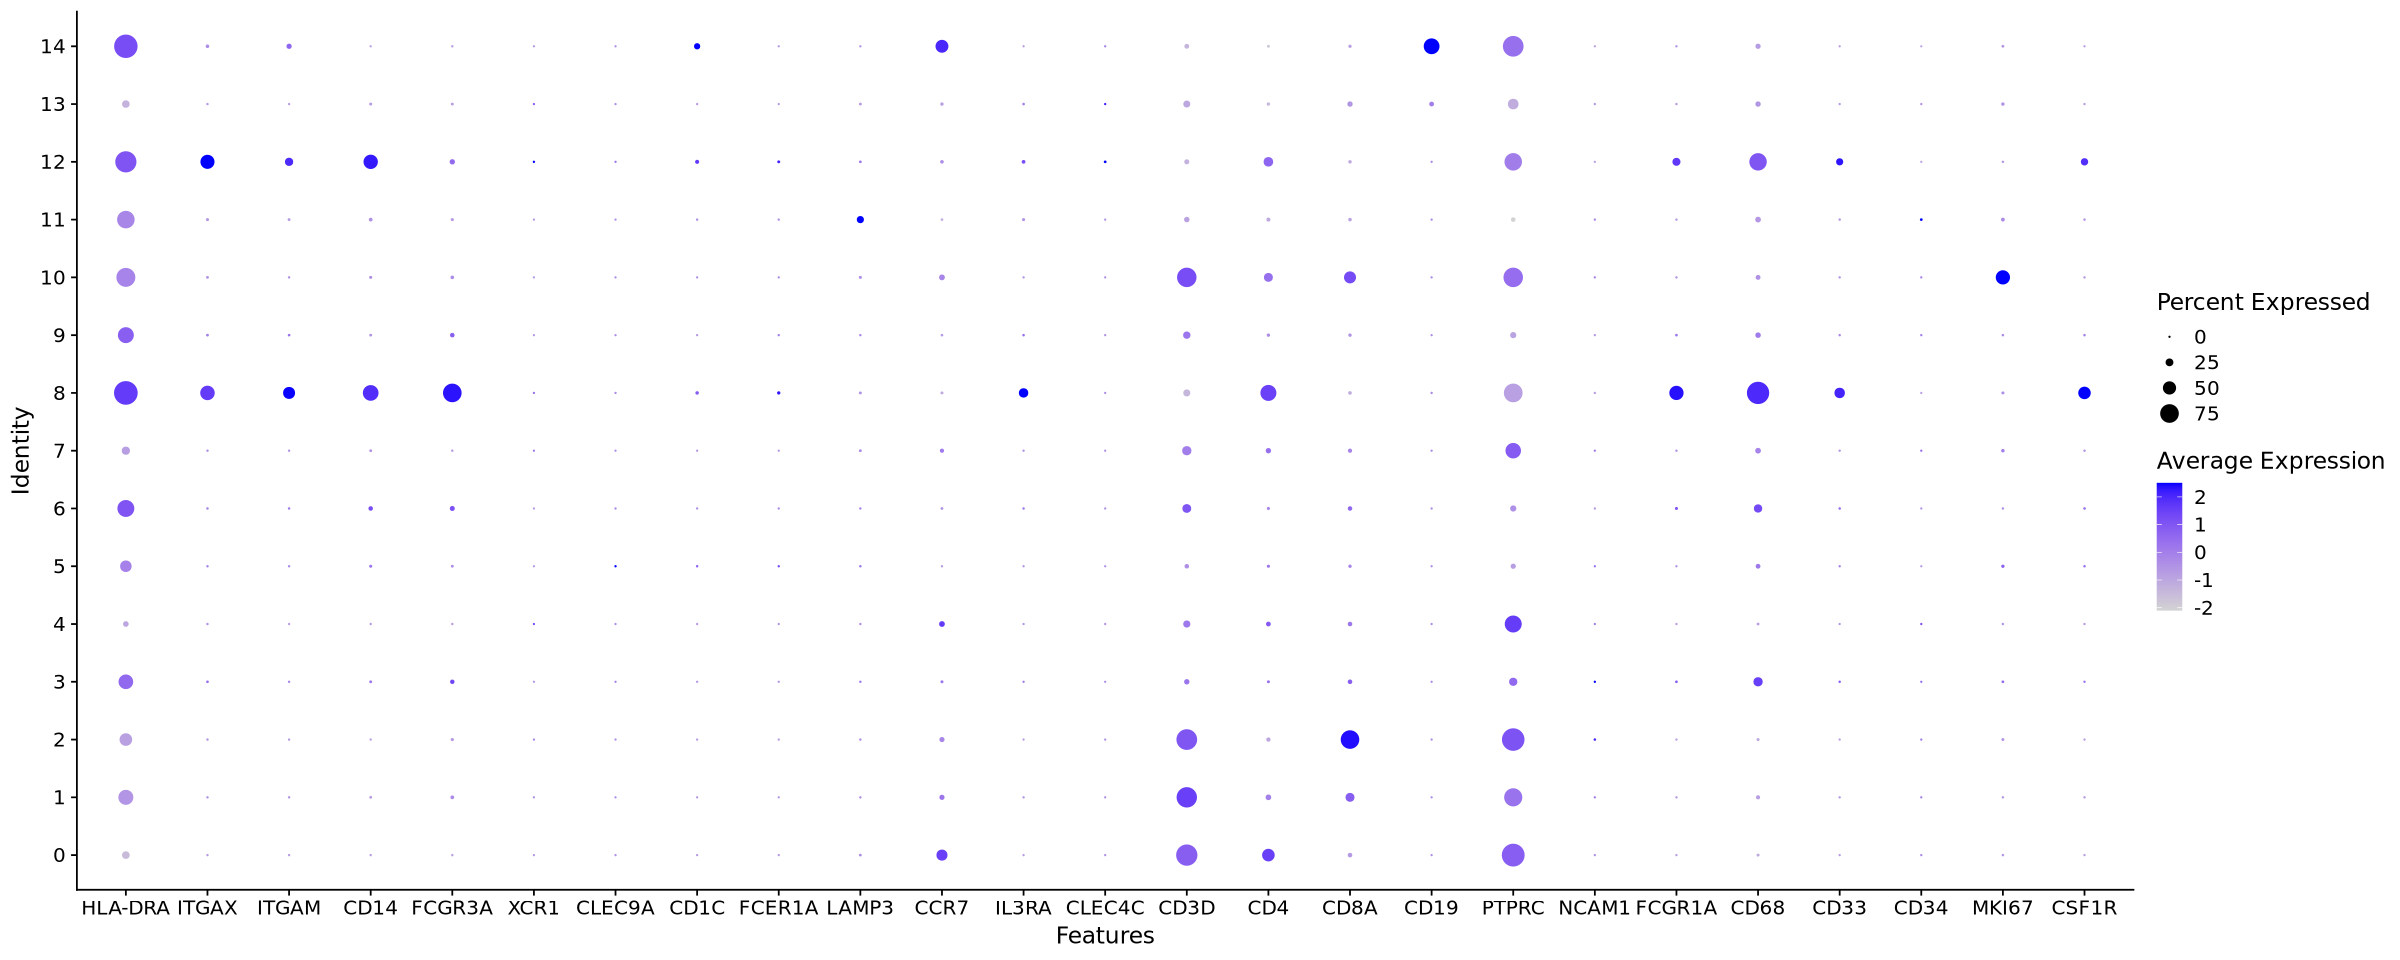

In [4]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(NSCLC, reduction = "umap", label=TRUE)

options(repr.plot.height=35, repr.plot.width=25)
FeaturePlot(NSCLC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(NSCLC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(NSCLC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### this dataset seems to be a bit weird, seems there is CD3 almost everywhere, sometimes tumours can do weird things and overexpress markers. Based off of myeloid markers going to take clusters 3,4,5,6,8,9,11,12 as the myeloid cells, now subsetting out these clusters

In [5]:
head(NSCLC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 GSE162498  4819       1184        
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 GSE162498   980        450        
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 GSE162498  6809       2199        
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 GSE162498  1236        631        
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 GSE162498  2610       1057        
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 GSE162498  5464       1231        
                                       sample_type cancer_type patient_id
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 tumour      NSCLC       P34       
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 tumour      NSCLC       P34       
                                       sample_id           percent.mt
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 GSE162498_NSCLC_P34 1.826105  
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 GSE162498_NSCLC_P34 8.265306  
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 GSE162498_NSCLC_P34 2.261712  
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 GSE162498_NSCLC_P34 2.346278  
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 GSE162498_NSCLC_P34 2.643678  
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 GSE162498_NSCLC_P34 2.049780  
                                       RNA_snn_res.0.2 seurat_clusters
GSE162498_NSCLC_P34_AAACGGGCAGCTCGAC-1 1               1              
GSE162498_NSCLC_P34_AAACGGGCATAGTAAG-1 4               4              
GSE162498_NSCLC_P34_AAACGGGGTACGACCC-1 10              10             
GSE162498_NSCLC_P34_AAAGATGGTAGTAGTA-1 1               1              
GSE162498_NSCLC_P34_AAAGATGTCTTAGCCC-1 1               1              
GSE162498_NSCLC_P34_AAAGCAAAGCGAAGGG-1 1               1

In [6]:
myeloid_NSCLC <- subset(NSCLC, subset = RNA_snn_res.0.2 %in% c("3","4","5","6","8","9","11","12"))

In [7]:
NSCLC
myeloid_NSCLC

An object of class Seurat 
45068 features across 66866 samples within 1 assay 
Active assay: RNA (45068 features, 2000 variable features)
 27 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
45068 features across 28781 samples within 1 assay 
Active assay: RNA (45068 features, 2000 variable features)
 27 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, scale.data
 2 dimensional reductions calculated: pca, umap

In [8]:
saveRDS(myeloid_NSCLC, "/scratch/user/s4436039/scdata/GSE162498/GSE162498_myeloid.RDS")

#### Following the above then need to move entire GSE162498 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE162498/ /QRISdata/Q5935/nikita/scdata/GSE162498
```